In [154]:
import pandas as pd
import os
import csv
engine='python'

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [155]:
current_directory = os.getcwd()
print(current_directory) 

C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\Notebooks


In [156]:
path = r'C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\CSV_Main\Africa_3years.csv'
df = pd.read_csv(path, index_col=0)

In [157]:
df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
data_id,,,,,,,,,,,,,,,,,,,,,
8403972,706,SOM34405,34405,30 July 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,...,Diinsoor,2.4074,42.9766,1,Radio Risala,National,"On 30 July 2021, Al Shabaab militants carried ...",0,1627934659,SOM
8403725,706,SOM34404,34404,30 July 2021,2021,1,Battles,Non-state actor overtakes territory,Al Shabaab,NaN,...,Daynuunay,3.0399,43.7969,1,Calamada,Subnational,"On 30 July 2021, Al Shabaab militants attacked...",1,1627934658,SOM
8403994,148,CHA1310,1310,30 July 2021,2021,1,Protests,Excessive force against protesters,Protesters (Chad),NaN,...,NDjamena,12.1085,15.0482,1,RFI,International,"On 30 July 2021, the Mobile Intervention Unit ...",0,1627934659,TCD
8403499,854,BFO5097,5097,30 July 2021,2021,1,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,...,Tialboanga,12.3512,1.2778,1,Signal; Facebook,New media,"On 30 July 2021, presumed JNIM militants made ...",0,1627934658,BFA
8404027,788,TUN8675,8675,30 July 2021,2021,1,Protests,Peaceful protest,Protesters (Tunisia),NaN,...,Redeyef,34.3827,8.1555,1,Tunisie Numerique,National,"On 30 July 2021, residents held a sit-in in Re...",0,1627934659,TUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7580116,566,NIG12918,12918,30 July 2018,2018,1,Protests,Peaceful protest,Protesters (Nigeria),TRTU: Tricycle Riders Transport Union,...,Maiduguri,11.8312,13.1517,1,Vanguard (Nigeria),National,30 July. Tricycle operators under the aegis of...,0,1618566301,NGA
7999450,706,SOM26334,26334,30 July 2018,2018,1,Explosions/Remote violence,Grenade,Al Shabaab,NaN,...,Mogadishu - Hodan,2.0333,45.3500,1,Undisclosed Source,Local partner-Other,"On 30 July, a grenade was thrown at Somali Nat...",0,1621903738,SOM
8380396,466,MLI2204,2204,30 July 2018,2018,1,Explosions/Remote violence,Remote explosive/landmine/IED,Ansar Dine,JNIM: Group for Support of Islam and Muslims,...,Kidal,18.4400,1.4100,2,Twitter,New media,"On 30 July 2018, presumed Ansar Dine militant ...",0,1626129975,MLI


In [167]:
# using jupyter widget to create a drop down to filter by country and eventtype

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [168]:
dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df.country))
dropdown_eventtype = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df.event_type))

In [169]:
# output_country = widgets.Output()
output = widgets.Output()
plot_output = widgets.Output()

In [170]:
def common_filtering(country, event_type):
    output.clear_output()
    plot_output.clear_output()
    
    if (country == ALL) & (event_type == ALL):
        common_filter = df
    elif (country == ALL):
        common_filter = df[df.event_type == event_type]
    elif (event_type == ALL):
        common_filter = df[df.country == country]
    else:
        common_filter = df[(df.country == country) & 
                                  (df.event_type == event_type)]
    
    with output:
        display(common_filter)
        
    with plot_output:
        sns.kdeplot(common_filter['fatalities'], shade=True)
        plt.show()

In [171]:
def dropdown_country_eventhandler(change):
    common_filtering(change.new, dropdown_eventtype.value)
def dropdown_eventtype_eventhandler(change):
    common_filtering(dropdown_country.value, change.new)



In [172]:
dropdown_eventtype.observe(dropdown_eventtype_eventhandler, names='value')


In [173]:
dropdown_country.observe(dropdown_country_eventhandler, names='value')


In [176]:
display(dropdown_country)
display(dropdown_eventtype)

Dropdown(index=15, options=('ALL', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Camer…

Dropdown(index=3, options=('ALL', 'Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic dev…

In [177]:
display(output)
display(plot_output)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "         iso event_id_cnty  event_id_n…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 576x396 with 1 Axes>', 'i…

# Initial ACLED Data Cleaning and Exploration 

In [41]:
# how many rows and columns
df.shape

(85200, 30)

In [42]:
# top 5
df.head(5)

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
data_id,,,,,,,,,,,,,,,,,,,,,
8403972,706,SOM34405,34405,30 July 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,...,Diinsoor,2.4074,42.9766,1,Radio Risala,National,"On 30 July 2021, Al Shabaab militants carried ...",0,1627934659,SOM
8403725,706,SOM34404,34404,30 July 2021,2021,1,Battles,Non-state actor overtakes territory,Al Shabaab,NaN,...,Daynuunay,3.0399,43.7969,1,Calamada,Subnational,"On 30 July 2021, Al Shabaab militants attacked...",1,1627934658,SOM
8403994,148,CHA1310,1310,30 July 2021,2021,1,Protests,Excessive force against protesters,Protesters (Chad),NaN,...,NDjamena,12.1085,15.0482,1,RFI,International,"On 30 July 2021, the Mobile Intervention Unit ...",0,1627934659,TCD
8403499,854,BFO5097,5097,30 July 2021,2021,1,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,...,Tialboanga,12.3512,1.2778,1,Signal; Facebook,New media,"On 30 July 2021, presumed JNIM militants made ...",0,1627934658,BFA
8404027,788,TUN8675,8675,30 July 2021,2021,1,Protests,Peaceful protest,Protesters (Tunisia),NaN,...,Redeyef,34.3827,8.1555,1,Tunisie Numerique,National,"On 30 July 2021, residents held a sit-in in Re...",0,1627934659,TUN


In [43]:
# bottom 5
df.tail(5)

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
data_id,,,,,,,,,,,,,,,,,,,,,
7580116,566,NIG12918,12918,30 July 2018,2018,1,Protests,Peaceful protest,Protesters (Nigeria),TRTU: Tricycle Riders Transport Union,...,Maiduguri,11.8312,13.1517,1,Vanguard (Nigeria),National,30 July. Tricycle operators under the aegis of...,0,1618566301,NGA
7999450,706,SOM26334,26334,30 July 2018,2018,1,Explosions/Remote violence,Grenade,Al Shabaab,NaN,...,Mogadishu - Hodan,2.0333,45.3500,1,Undisclosed Source,Local partner-Other,"On 30 July, a grenade was thrown at Somali Nat...",0,1621903738,SOM
8380396,466,MLI2204,2204,30 July 2018,2018,1,Explosions/Remote violence,Remote explosive/landmine/IED,Ansar Dine,JNIM: Group for Support of Islam and Muslims,...,Kidal,18.4400,1.4100,2,Twitter,New media,"On 30 July 2018, presumed Ansar Dine militant ...",0,1626129975,MLI
4618224,800,UGA5156,5156,30 July 2018,2018,1,Riots,Violent demonstration,Rioters (Uganda),NaN,...,Kibingo,-0.5527,30.4159,2,Chimp Reports,National,"On 30 July, members of a local NGO at a protes...",0,1618581946,UGA
5636345,706,SOM26333,26333,30 July 2018,2018,1,Explosions/Remote violence,Air/drone strike,Military Forces of Kenya (2013-),NaN,...,Kibis,3.3314,41.9485,2,Intelligence Briefs; Mareeg News (Somalia),Other-National,"On 30 July, a Kenyan military warplane reporte...",19,1563903164,SOM


In [44]:
# selecting columns that are needed for the project

df_new = df[['event_type', 'notes']]

In [45]:
df_new

,event_type,notes
data_id,,
8403972,Battles,"On 30 July 2021, Al Shabaab militants carried ..."
8403725,Battles,"On 30 July 2021, Al Shabaab militants attacked..."
8403994,Protests,"On 30 July 2021, the Mobile Intervention Unit ..."
8403499,Violence against civilians,"On 30 July 2021, presumed JNIM militants made ..."
8404027,Protests,"On 30 July 2021, residents held a sit-in in Re..."
...,...,...
7580116,Protests,30 July. Tricycle operators under the aegis of...
7999450,Explosions/Remote violence,"On 30 July, a grenade was thrown at Somali Nat..."
8380396,Explosions/Remote violence,"On 30 July 2018, presumed Ansar Dine militant ..."


In [46]:
# checking how many unique event types there are for each note

df_new.groupby(['event_type'])['notes'].count()

event_type
Battles                       17808
Explosions/Remote violence     5640
Protests                      27498
Riots                          9574
Strategic developments         5192
Violence against civilians    19488
Name: notes, dtype: int64

In [47]:
# checking if there is a multi-labeling concept
len(df_new.notes.unique())


83666

In [48]:
df_new.value_counts()

event_type                  notes                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Protests                    From September 10 to October 9, in Mohandiseen, journalists at Tahrir Newspaper staged a sit-in protesting against a planned reduction in wages [size=no report].                                                                                                                                                                                                                                                                                                                       30


In [49]:
# checking for duplicate notes
duplicate_note = df_new[df_new.duplicated()]

In [50]:
duplicate_note

,event_type,notes
data_id,,
8394896,Violence against civilians,"On 19 July 2021, unknown attackers entered the..."
8394897,Violence against civilians,"On 19 July 2021, unknown attackers entered the..."
8394898,Violence against civilians,"On 19 July 2021, unknown attackers entered the..."
8394899,Violence against civilians,"On 19 July 2021, unknown attackers entered the..."
8394901,Violence against civilians,"On 19 July 2021, unknown attackers entered the..."
...,...,...
7919462,Violence against civilians,"On 2 Aug 2018, unidentified gunmen raided the ..."
5286660,Violence against civilians,1-14 August. 38 pro-Biafria agitators were kil...
8026794,Battles,At an unknown date before October 2018 (coded ...


In [51]:
# droping duplicates

df_new.drop_duplicates(keep='first', inplace=True)

C:\Users\ntsegie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# saving the new df as csv
df_new.to_csv(r'C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\CSV_Main\Africa_3years_clean_dataset.csv')

# Data Wrangling and Preprocessing

In [53]:
import nltk
import re
from string import digits
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

In [54]:
path = r'C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\CSV_Main\Africa_3years_clean_dataset.csv'
df = pd.read_csv(path, index_col=0)

In [55]:
df

,event_type,notes
data_id,,
8403972,Battles,"On 30 July 2021, Al Shabaab militants carried ..."
8403725,Battles,"On 30 July 2021, Al Shabaab militants attacked..."
8403994,Protests,"On 30 July 2021, the Mobile Intervention Unit ..."
8403499,Violence against civilians,"On 30 July 2021, presumed JNIM militants made ..."
8404027,Protests,"On 30 July 2021, residents held a sit-in in Re..."
...,...,...
7580116,Protests,30 July. Tricycle operators under the aegis of...
7999450,Explosions/Remote violence,"On 30 July, a grenade was thrown at Somali Nat..."
8380396,Explosions/Remote violence,"On 30 July 2018, presumed Ansar Dine militant ..."


In [56]:
# Total number of rows and columns
df.shape


(83694, 2)

In [57]:
# checking if there are null values

print(df.isnull().sum())

event_type    0
notes         0
dtype: int64


In [58]:
#converting text to lower case
df['notes'] = df['notes'].str.lower()

In [59]:
example_notes = df.iloc[0]
print(example_notes['notes'])

on 30 july 2021, al shabaab militants carried out a hit and run attack against government police forces (swpsf) in diinsoor town (diinsoor, bay). two civilian bystanders were injured.


In [60]:
#word tokenizing

def identify_tokens(row):
    notes = row['notes']
    tokens = nltk.word_tokenize(notes)
    # taking only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['token_words'] = df.apply(identify_tokens, axis=1)


In [61]:
df.head(5)

,event_type,notes,token_words
data_id,,,
8403972,Battles,"on 30 july 2021, al shabaab militants carried ...","[on, july, al, shabaab, militants, carried, ou..."
8403725,Battles,"on 30 july 2021, al shabaab militants attacked...","[on, july, al, shabaab, militants, attacked, g..."
8403994,Protests,"on 30 july 2021, the mobile intervention unit ...","[on, july, the, mobile, intervention, unit, us..."
8403499,Violence against civilians,"on 30 july 2021, presumed jnim militants made ...","[on, july, presumed, jnim, militants, made, an..."
8404027,Protests,"on 30 july 2021, residents held a sit-in in re...","[on, july, residents, held, a, in, redeyef, re..."


In [62]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [63]:
df["clean_notes"] = df["token_words"].apply(lambda x: word_lemmatizer(x))
df

,event_type,notes,token_words,clean_notes
data_id,,,,
8403972,Battles,"on 30 july 2021, al shabaab militants carried ...","[on, july, al, shabaab, militants, carried, ou...","[on, july, al, shabaab, militant, carried, out..."
8403725,Battles,"on 30 july 2021, al shabaab militants attacked...","[on, july, al, shabaab, militants, attacked, g...","[on, july, al, shabaab, militant, attacked, go..."
8403994,Protests,"on 30 july 2021, the mobile intervention unit ...","[on, july, the, mobile, intervention, unit, us...","[on, july, the, mobile, intervention, unit, us..."
8403499,Violence against civilians,"on 30 july 2021, presumed jnim militants made ...","[on, july, presumed, jnim, militants, made, an...","[on, july, presumed, jnim, militant, made, an,..."
8404027,Protests,"on 30 july 2021, residents held a sit-in in re...","[on, july, residents, held, a, in, redeyef, re...","[on, july, resident, held, a, in, redeyef, red..."
...,...,...,...,...
7580116,Protests,30 july. tricycle operators under the aegis of...,"[july, tricycle, operators, under, the, aegis,...","[july, tricycle, operator, under, the, aegis, ..."
7999450,Explosions/Remote violence,"on 30 july, a grenade was thrown at somali nat...","[on, july, a, grenade, was, thrown, at, somali...","[on, july, a, grenade, wa, thrown, at, somali,..."
8380396,Explosions/Remote violence,"on 30 july 2018, presumed ansar dine militant ...","[on, july, presumed, ansar, dine, militant, de...","[on, july, presumed, ansar, dine, militant, de..."


In [64]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [65]:
df["new_notes"] = df["clean_notes"].apply(lambda x: remove_stopwords(x))


KeyboardInterrupt: 

In [ ]:
df = df[[event_type], [new_notes]]

In [ ]:
df

In [ ]:
# saving the new df as csv
df_new.to_csv(r'C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\CSV_Main\Africa_3years_preprocessed_dataset.csv')

# Modeling and Visualization

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import nltk
import sklearn
import re


from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

from sklearn.pipeline import Pipeline


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import MultinomialNB





In [205]:
path = r'C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\ACLED\CSV_Main\Africa_3years_preprocessed_dataset.csv'

In [206]:
df = pd.read_csv(path)

In [207]:
df

,data_id,event_type,notes
0,8403972,Battles,"On 30 July 2021, Al Shabaab militants carried ..."
1,8403725,Battles,"On 30 July 2021, Al Shabaab militants attacked..."
2,8403994,Protests,"On 30 July 2021, the Mobile Intervention Unit ..."
3,8403499,Violence against civilians,"On 30 July 2021, presumed JNIM militants made ..."
4,8404027,Protests,"On 30 July 2021, residents held a sit-in in Re..."
...,...,...,...
83689,7580116,Protests,30 July. Tricycle operators under the aegis of...
83690,7999450,Explosions/Remote violence,"On 30 July, a grenade was thrown at Somali Nat..."
83691,8380396,Explosions/Remote violence,"On 30 July 2018, presumed Ansar Dine militant ..."
83692,4618224,Riots,"On 30 July, members of a local NGO at a protes..."


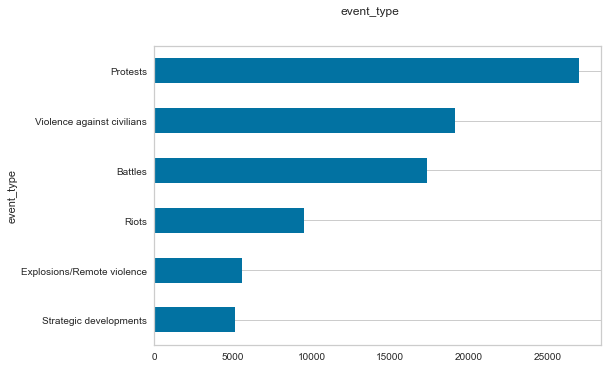

In [208]:
x = "event_type"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [209]:
print("--- Original notes ---")
print(df["notes"])
print("--- Notes turned to lowercase ---")
notes = re.sub(r'[^\w\s]', '', str(df["notes"]).lower().strip())
print(notes)
print("--- tokenized Notes ---")
notes = notes.split()
print(notes)

--- Original notes ---
0        On 30 July 2021, Al Shabaab militants carried ...
1        On 30 July 2021, Al Shabaab militants attacked...
2        On 30 July 2021, the Mobile Intervention Unit ...
3        On 30 July 2021, presumed JNIM militants made ...
4        On 30 July 2021, residents held a sit-in in Re...
                               ...                        
83689    30 July. Tricycle operators under the aegis of...
83690    On 30 July, a grenade was thrown at Somali Nat...
83691    On 30 July 2018, presumed Ansar Dine militant ...
83692    On 30 July, members of a local NGO at a protes...
83693    On 30 July, a Kenyan military warplane reporte...
Name: notes, Length: 83694, dtype: object
--- Notes turned to lowercase ---
0        on 30 july 2021 al shabaab militants carried 
1        on 30 july 2021 al shabaab militants attacked
2        on 30 july 2021 the mobile intervention unit 
3        on 30 july 2021 presumed jnim militants made 
4        on 30 july 2021 residen

In [210]:
def plotConfusionMaxtrix(confmat_data=None,xlabel='',ylabel='',title='',cmap=plt.cm.Blues,plt_ax=None):
    """
    Used for drawing - confusion matrix
    """
    plt_ax.matshow(confmat_data, cmap=cmap, alpha=0.75)
    for i in range(confmat_data.shape[0]):
        for j in range(confmat_data.shape[1]):
            plt_ax.text(x=j, y=i,s=confmat_data[i, j],va='center', ha='center',fontsize=12)
    plt_ax.set_xlabel(xlabel,fontsize=12)
    plt_ax.set_ylabel(ylabel,fontsize=12)
    plt_ax.set_title(title,fontsize=12)
    return 

In [211]:

X = df["notes"].values
y_raw = df["event_type"].values

In [212]:
# encoding our labels
encoder = LabelEncoder()
encoder.fit(y_raw)
y = encoder.transform(y_raw)
print(y)

[0 0 2 ... 1 3 1]


In [213]:
#checking out the classes
print(encoder.classes_)

['Battles' 'Explosions/Remote violence' 'Protests' 'Riots'
 'Strategic developments' 'Violence against civilians']


In [214]:
# if we want to go backwards and interpret what the numeric labels mean:
print(encoder.inverse_transform([0, 0, 1, 2]))

['Battles' 'Battles' 'Explosions/Remote violence' 'Protests']


# # Classification Models with Vectorizers
(-) Random Forest Classifier
(-) Logistic Regression
(-) MultinomialNB
(-) Count Vectorizer
(-) TFidf Vectorizer

In [220]:
vectorizers = [CountVectorizer(), TfidfVectorizer()]
algorithms = [RandomForestClassifier(), LogisticRegression(), MultinomialNB()] # add Naive Bayes Classifier also


In [221]:
def score_model(X, y, algorithm, vectorizer):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(algorithm.__class__.__name__, f1_score(expected, predicted, average='micro')))


In [222]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        score_model(X, y, algorithm, vectorizer)

RandomForestClassifier: 0.8900072411296163
RandomForestClassifier: 0.8887038377986965


C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9412020275162926


C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9343953656770456
MultinomialNB: 0.856480811006517
MultinomialNB: 0.7919985517740769


In [59]:
# Note - Logistic Regression seems to gives better outcome

In [14]:
def visualize_model(X, y, algorithm, vectorizer):
    """
    Visually compare the models
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=encoder.classes_
    )
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

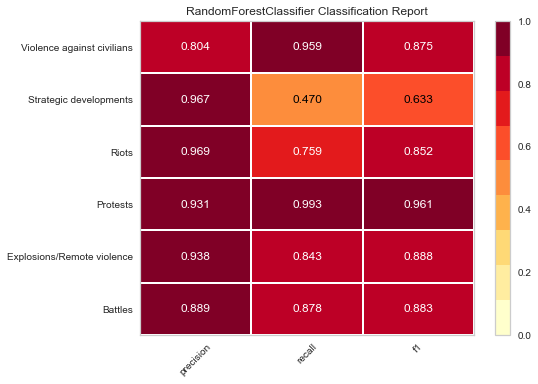

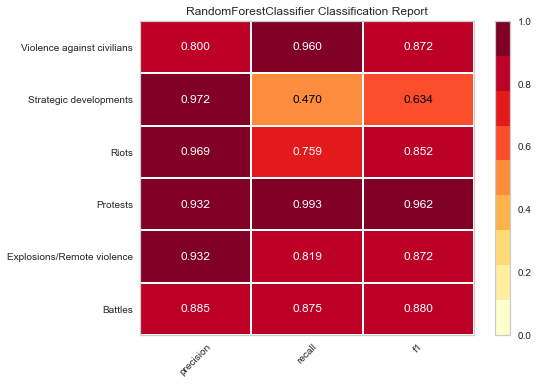

C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


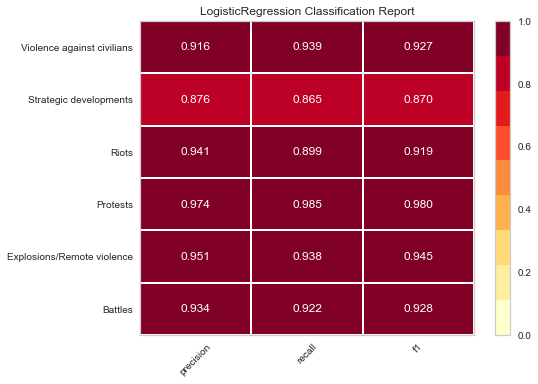

C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


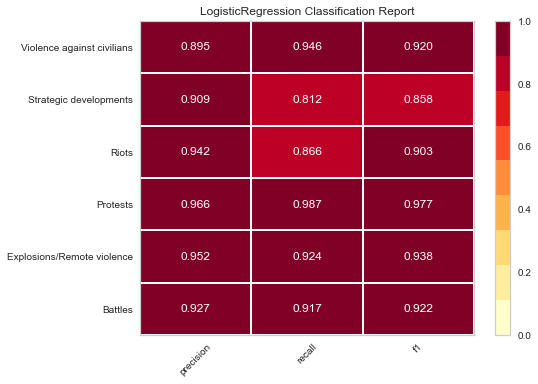

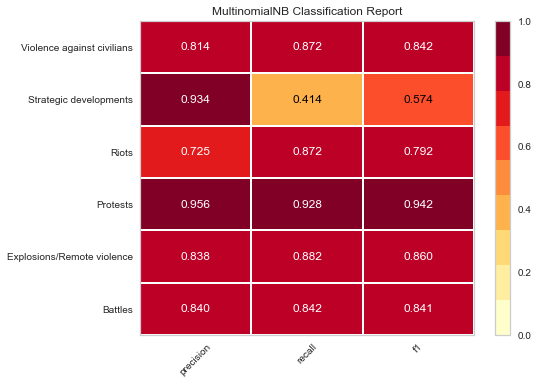

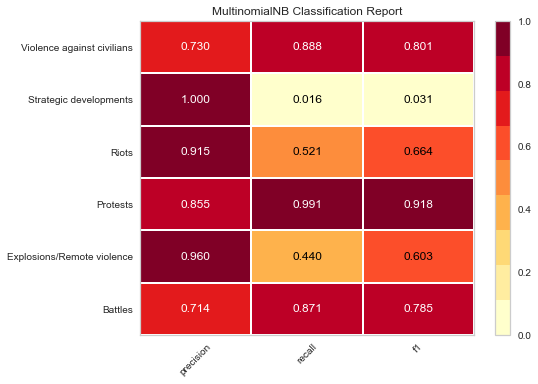

In [15]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        visualize_model(X, y, algorithm, vectorizer)



In [39]:
# Create class prediction error function

def evaluate_model(X, y, algorithm, vectorizer):
    """
    Evaluate various estimators.
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

  
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
# Instantiate the class prediction error and visualizer
    visualizer = ClassPredictionError(
        model, classes=encoder.classes_
    )

# Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
    visualizer.score(X_test, y_test)

# Draw visualization
    visualizer.show()

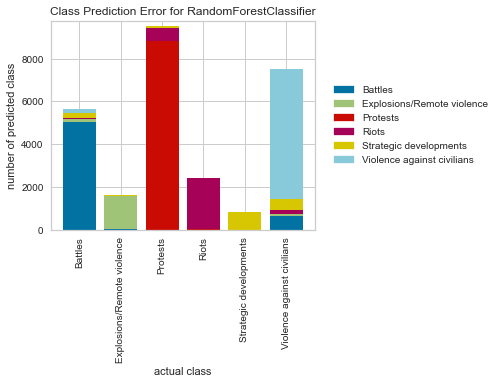

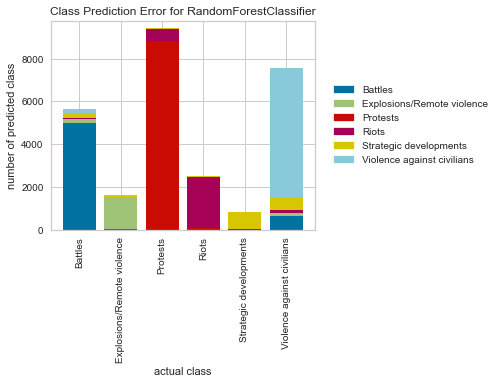

C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


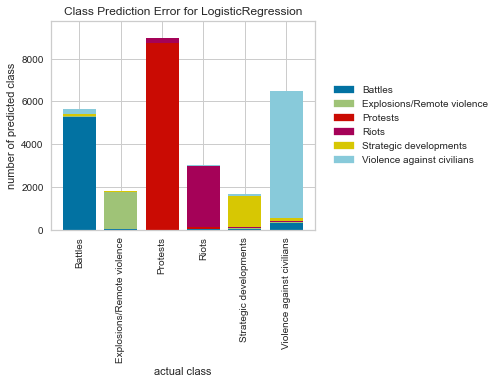

C:\Users\ntsegie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


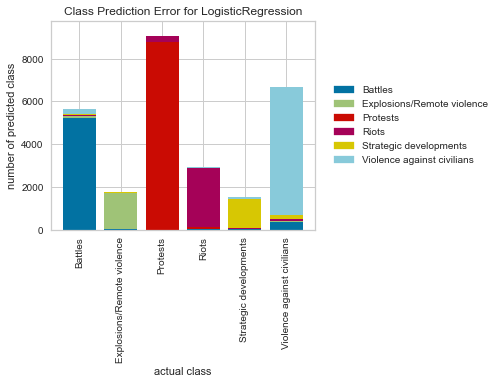

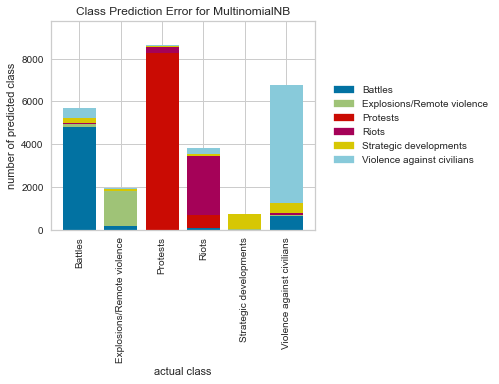

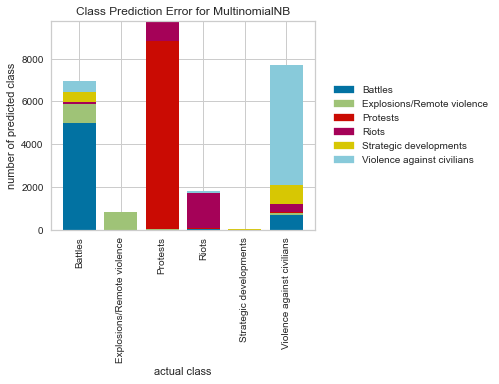

In [40]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        evaluate_model(X, y, algorithm, vectorizer)

In [ ]:
# Hyperparameter Tuning with Grid search 

grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_scores_

In [225]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_scores_